In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_excel('EastWestAirlines.xlsx',index_col=0)
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award?  
ID#           
1          0  
2          0  
3          0  
4          0  
5          1  
...      ...  
4017       1  
4018       1  
4019       1  
4020       0  
4021       0  

[3999 rows x 11 columns]

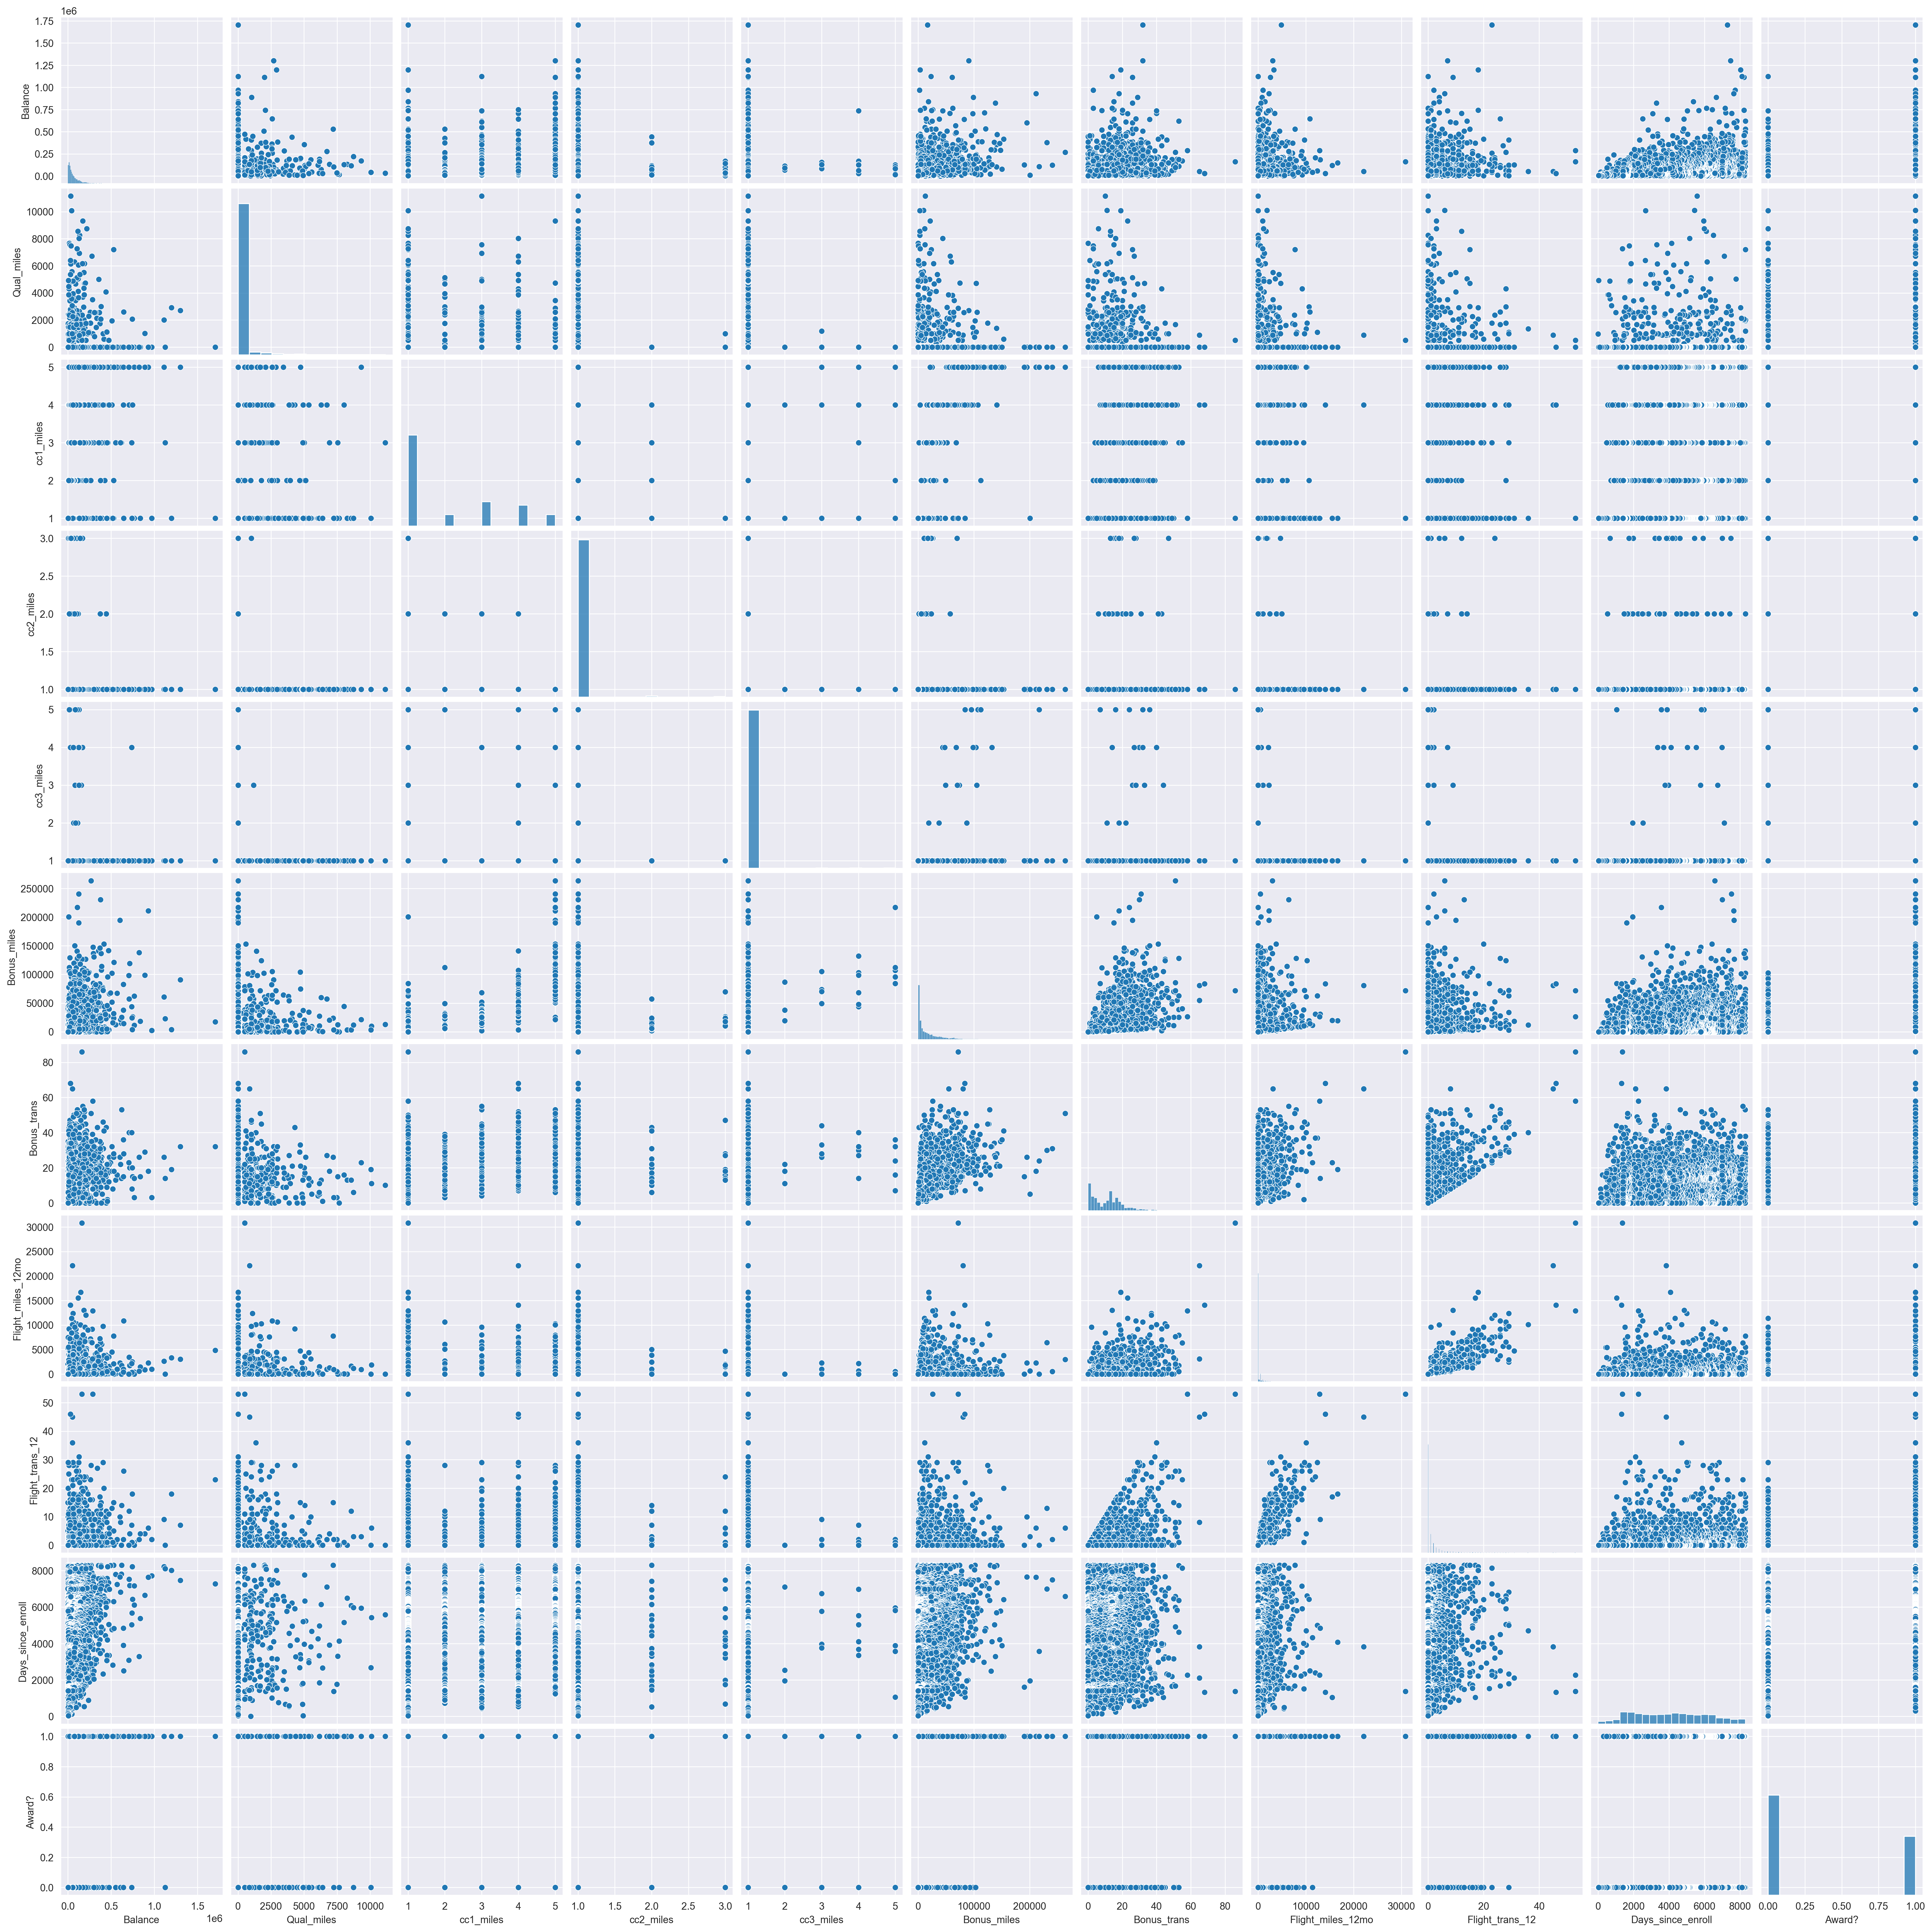

In [3]:
sns.pairplot(df)

In [4]:
#Feature Scaling

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -5.24808944e-01,  4.44973763e-02],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -5.24808944e-01,  4.44973763e-02],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -5.24808944e-01,  4.44973763e-02],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
         1.30391816e+00,  1.32102304e+00,  4.44973763e-02],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -5.24808944e-01,  4.44973763e-02],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -5.24808944e-01,  4.44973763e-02]])

# Hierarchical

In [7]:
from scipy.cluster import hierarchy

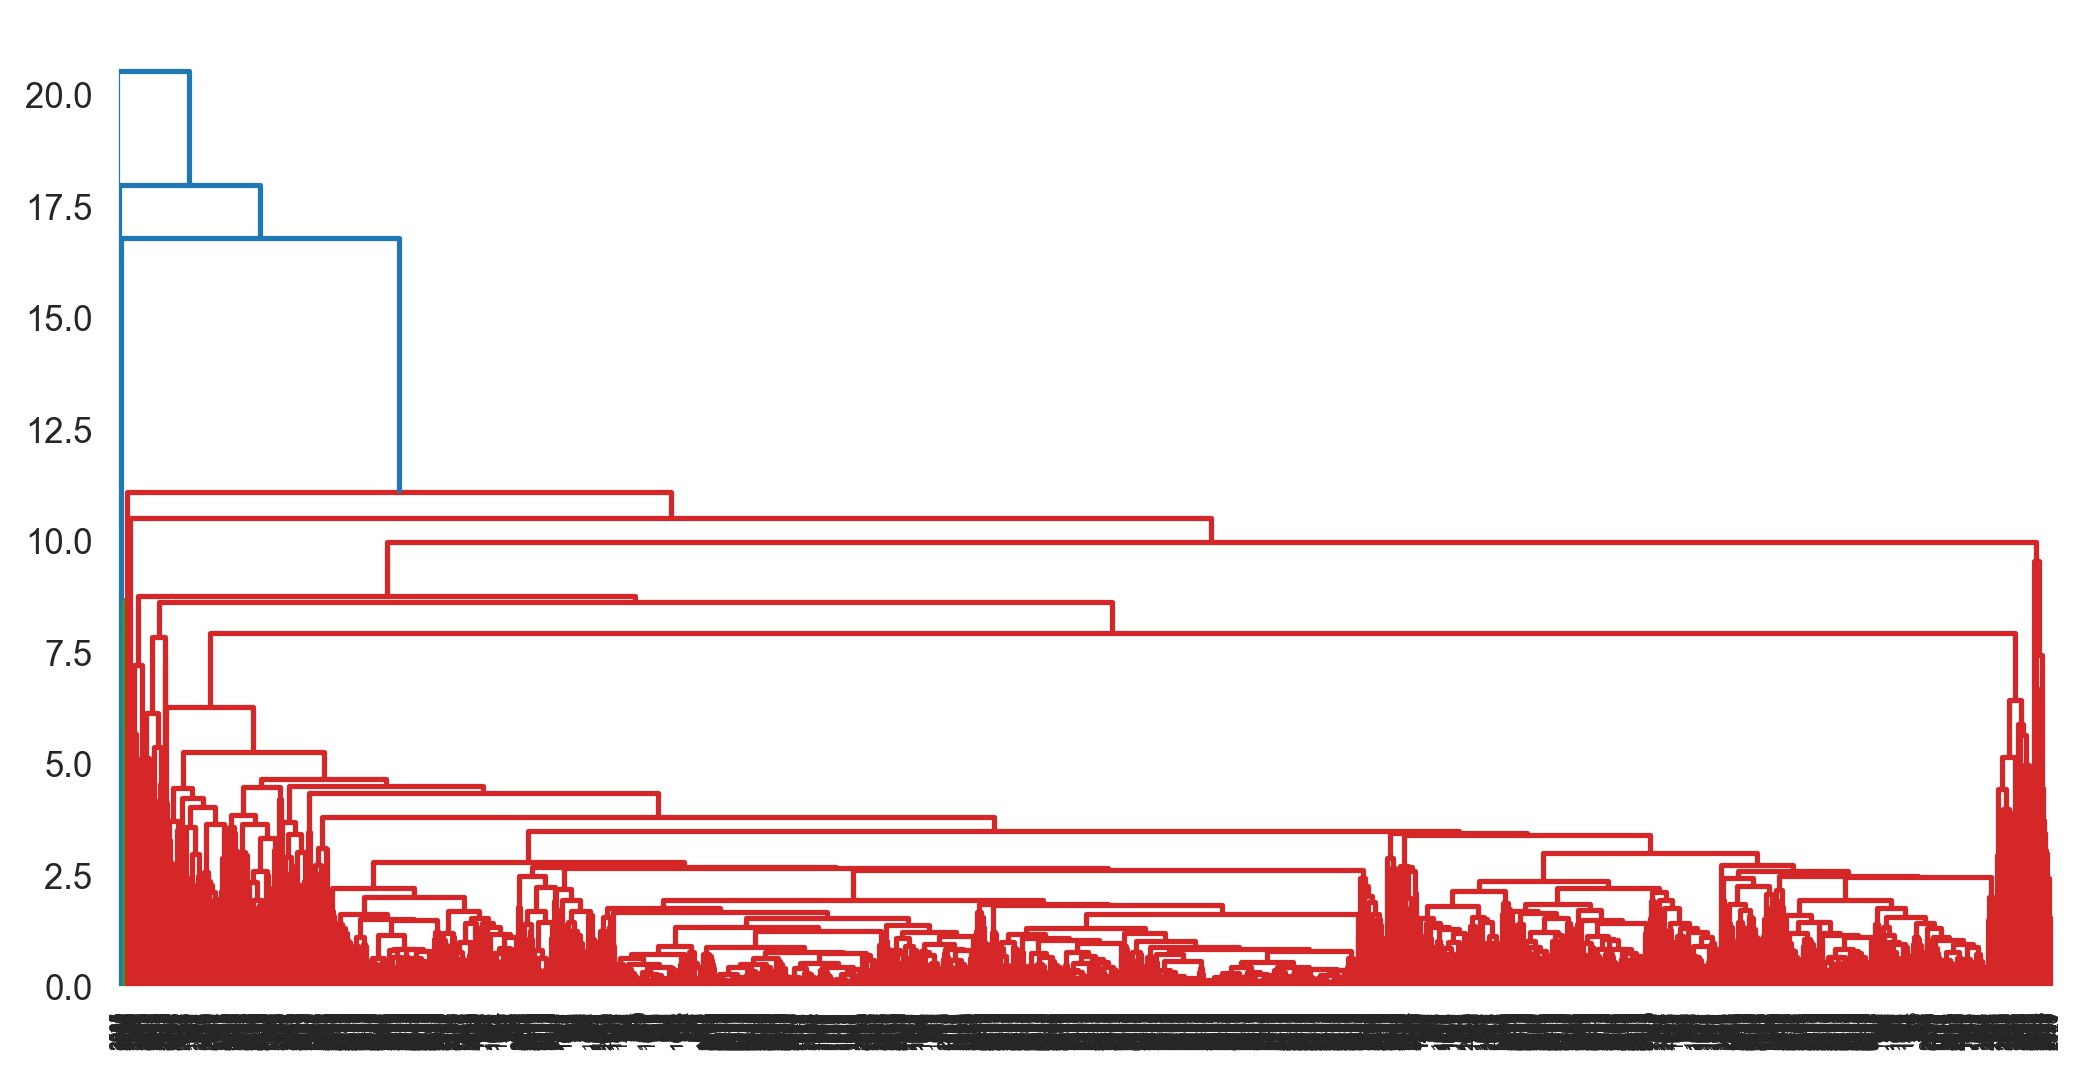

In [8]:
lk = hierarchy.linkage(x, method='average')
dendrogram = hierarchy.dendrogram(lk)

In [9]:
#Model Building

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
hc = AgglomerativeClustering(n_clusters=4)

ypred = hc.fit_predict(x)

In [62]:
from sklearn.metrics import silhouette_score

In [63]:
silhouette_score(x,ypred)

0.37397671135365734

In [12]:
df['cluster'] = ypred
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award?  cluster  
ID#                    
1          0        1  
2          0        1  
3          0        1  
4          0        1  
5          1        0  
...      ...      ...  
4017       1        1  
4018       1        1  
4019       1        0  
4020       0        1  
4021       0        1  

[3999 rows x 12 columns]

In [13]:
df.groupby('cluster').agg('mean')

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
cluster                                                               
0        116314.450725  363.839130   3.498551   1.000000   1.035507   
1         46329.336877    9.028618   1.244072   1.000000   1.000000   
2        134880.892308  393.323077   2.430769   1.000000   1.000000   
3         68876.581395   23.255814   1.139535   2.348837   1.000000   

          Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
cluster                                                                  
0        37150.356522    18.066667         377.000000         1.150000   
1         4868.112428     6.907604         214.812756         0.673753   
2        36582.169231    29.338462        5915.523077        16.638462   
3        14689.837209    17.534884         582.627907         2.209302   

         Days_since_enroll    Award?  
cluster                               
0              4696.888406  0.663043  
1              3769.337694  0.184383  
2              4599.607692  0.753846  
3              3968.930233  0.395349

In [14]:
df[df['cluster'] == 0]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
5       97752           0          4          1          1        43300   
7       84914           0          3          1          1        27482   
10     104860           0          3          1          1        28426   
12      96522           0          5          1          1        61105   
16      28495           0          4          1          1        49442   
...       ...         ...        ...        ...        ...          ...   
4002    57793           0          3          1          1        20959   
4003    28867           0          3          1          1        19169   
4008    59017           0          4          1          1        34746   
4014    39142           0          3          1          1        14981   
4019    73597           0          3          1          1        25447   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
5              26               2077                4               6935   
7              25                  0                0               6994   
10             28               1150                3               6931   
12             19                  0                0               6924   
16             15                  0                0               6912   
...           ...                ...              ...                ...   
4002           15               1198                3               1424   
4003           28                  0                0               1425   
4008           25                  0                0               1418   
4014           28                  0                0               1408   
4019            8                  0                0               1402   

      Award?  cluster  
ID#                    
5          1        0  
7          0        0  
10         1        0  
12         1        0  
16         1        0  
...      ...      ...  
4002       1        0  
4003       0        0  
4008       0        0  
4014       0        0  
4019       1        0  

[1380 rows x 12 columns]

In [15]:
df[df['cluster'] == 1]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
6       16420           0          1          1          1            0   
...       ...         ...        ...        ...        ...          ...   
4016     3974           0          1          1          1          365   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
6               0                  0                0               6942   
...           ...                ...              ...                ...   
4016            3                  0                0               1397   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award?  cluster  
ID#                    
1          0        1  
2          0        1  
3          0        1  
4          0        1  
6          0        1  
...      ...      ...  
4016       0        1  
4017       1        1  
4018       1        1  
4020       0        1  
4021       0        1  

[2446 rows x 12 columns]

<Axes: xlabel='Days_since_enroll', ylabel='Balance'>

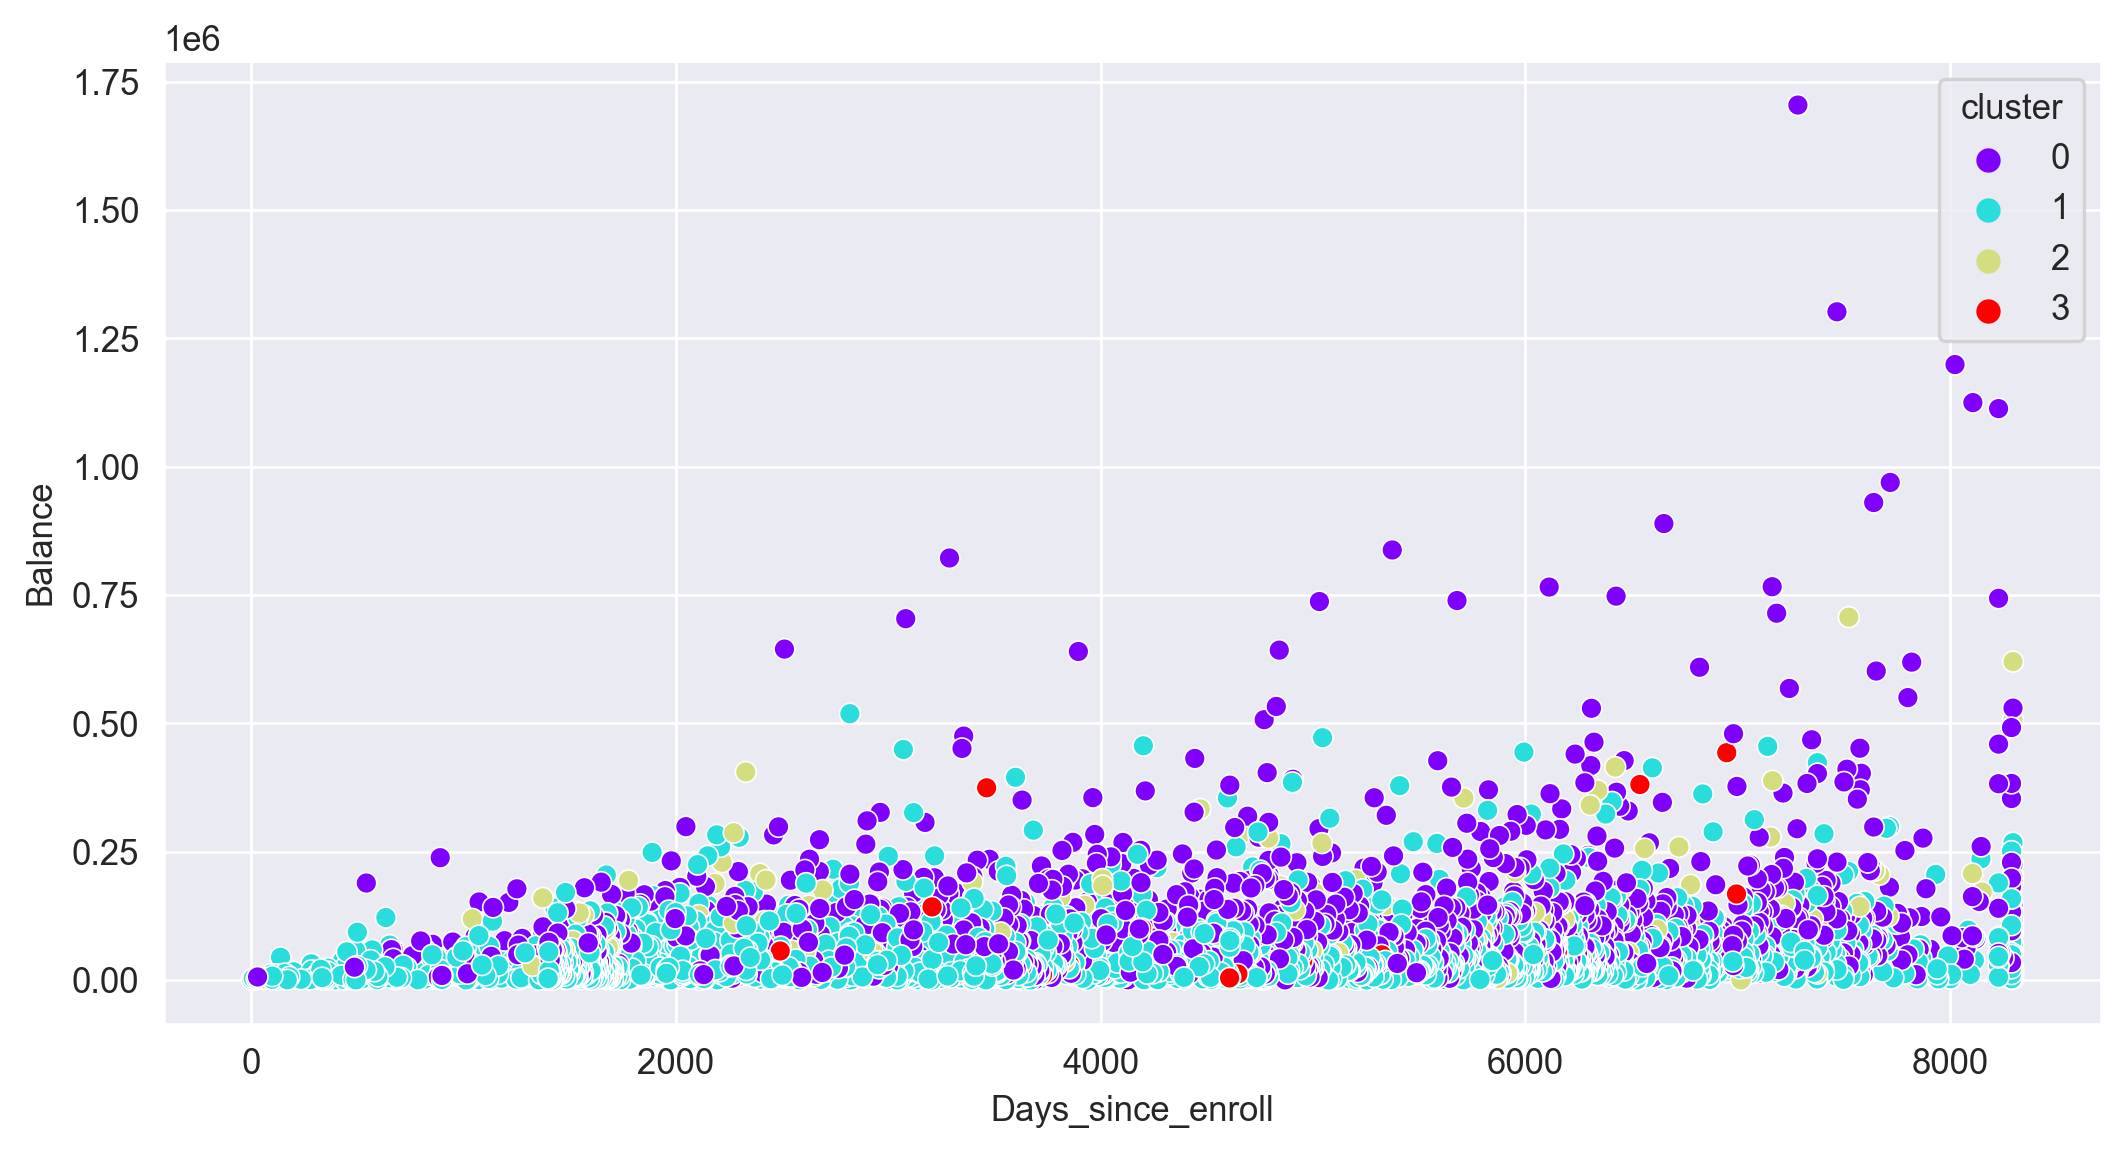

In [16]:
sns.scatterplot(x=df['Days_since_enroll'],y= df['Balance'], hue=df['cluster'], palette='rainbow')

# Kmeans

In [17]:
#Model Building

In [18]:
from sklearn.cluster import KMeans

In [19]:
km = KMeans()
yp = km.fit_predict(x)
yp

array([4, 4, 4, ..., 5, 1, 1])

In [20]:
#cluster centre
km.cluster_centers_

array([[ 6.42787817e-01, -1.06246662e-01,  1.55562670e+00,
        -9.82418871e-02, -5.02726250e-02,  1.36988578e+00,
         8.70373375e-01, -5.07964342e-02, -5.09150973e-02,
         4.06071862e-01,  5.38718464e-01],
       [-3.87755253e-01, -1.44345997e-01, -5.88146828e-01,
        -9.82418871e-02, -6.27665798e-02, -5.28307335e-01,
        -5.21336656e-01, -2.21689246e-01, -2.43801729e-01,
        -9.75222109e-01, -7.66919299e-01],
       [ 1.24463396e+00,  4.86198029e-01,  2.36594659e-01,
        -9.82418871e-02, -6.27665798e-02,  8.04931022e-01,
         1.89972964e+00,  4.05535908e+00,  4.30382999e+00,
         3.11921808e-01,  9.30488454e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01],
       [-1.38414986e-01, -1.43717877e-01, -4.04529545e-01,
        -9.82418871e-02, -5.74801800e-02, -4.49284222e-01,
  

In [21]:
#Visualize the clusters

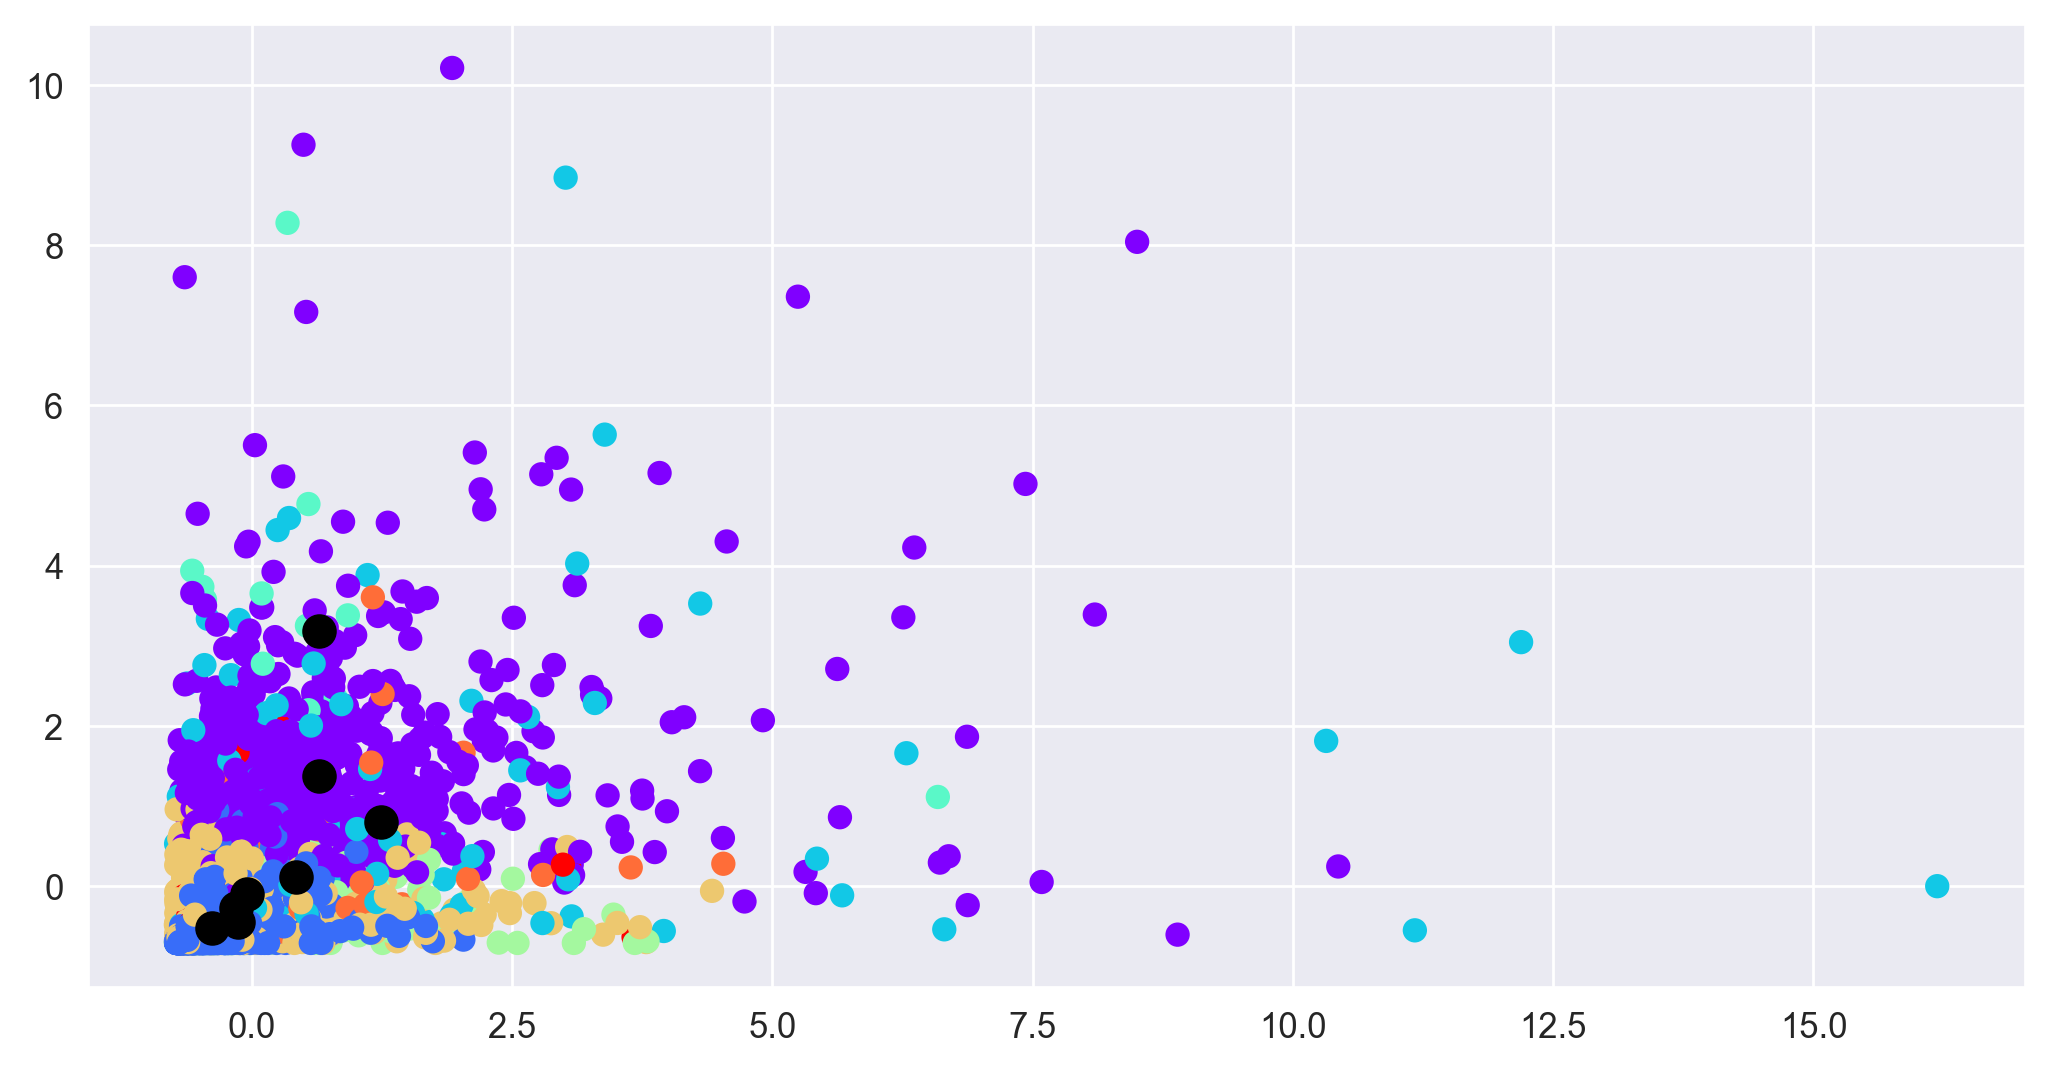

In [22]:
plt.scatter(x[:,0],x[:,5], c = yp, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,5], c = 'black', s = 80)

In [23]:
#Elbow graph

In [24]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [25]:
wcss

[43989.000000000015,
 35409.50939704234,
 30899.246824652197,
 27153.760246423168,
 24541.189859381237,
 21089.69478480692,
 18891.75016901845,
 17316.75360435649,
 15964.227285901317,
 14727.240563723935]

Text(0.5, 1.0, 'Elbow Graph')

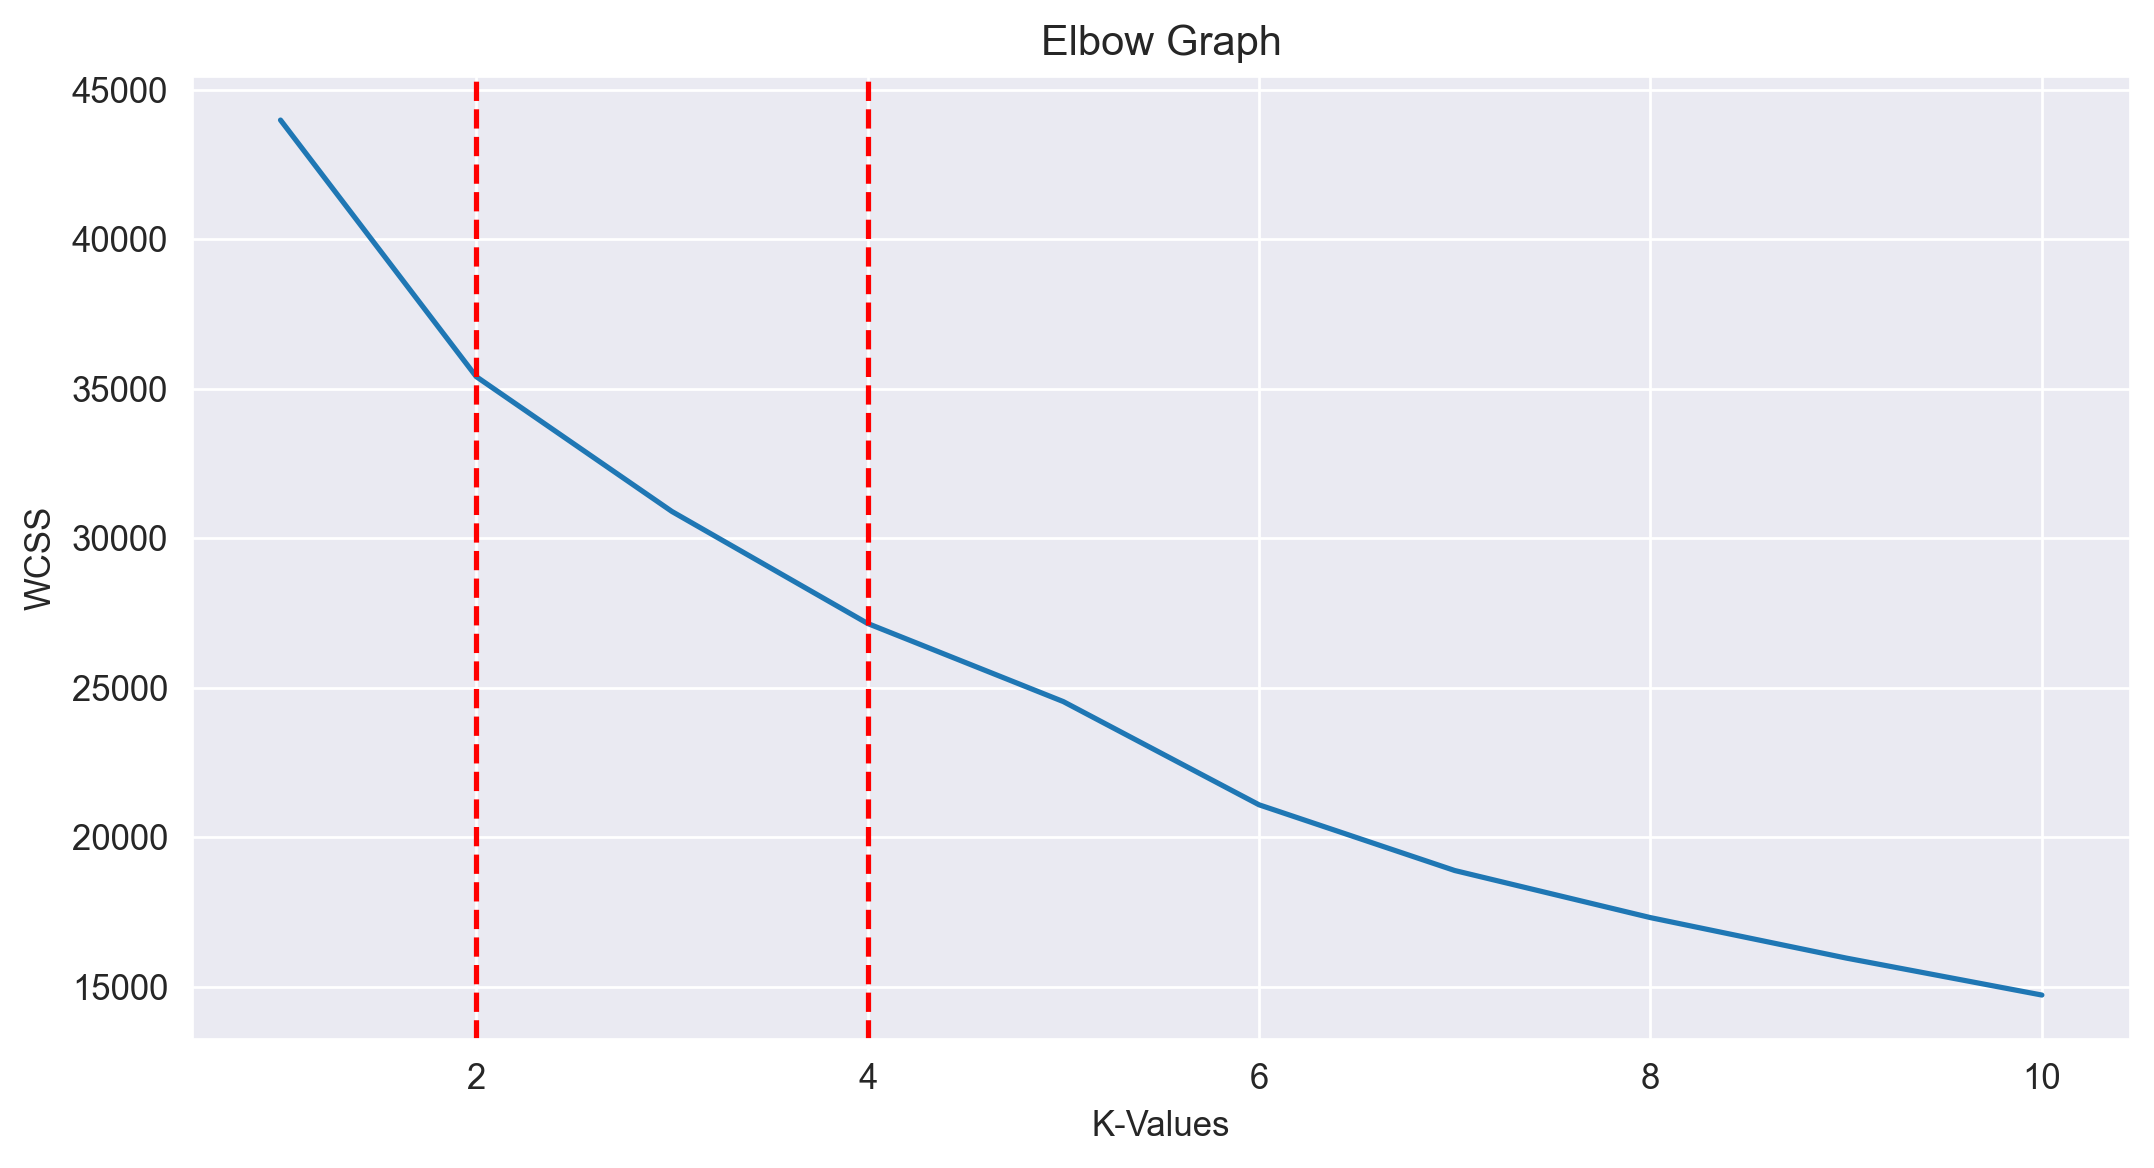

In [26]:
plt.plot(range(1,11),wcss)
plt.axvline(x = 2, linestyle = '--', color = 'red')
plt.axvline(x = 4, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

In [27]:
#Final Model

In [28]:
km = KMeans(n_clusters=4)
ypred = km.fit_predict(x)
ypred

array([1, 1, 1, ..., 2, 1, 1])

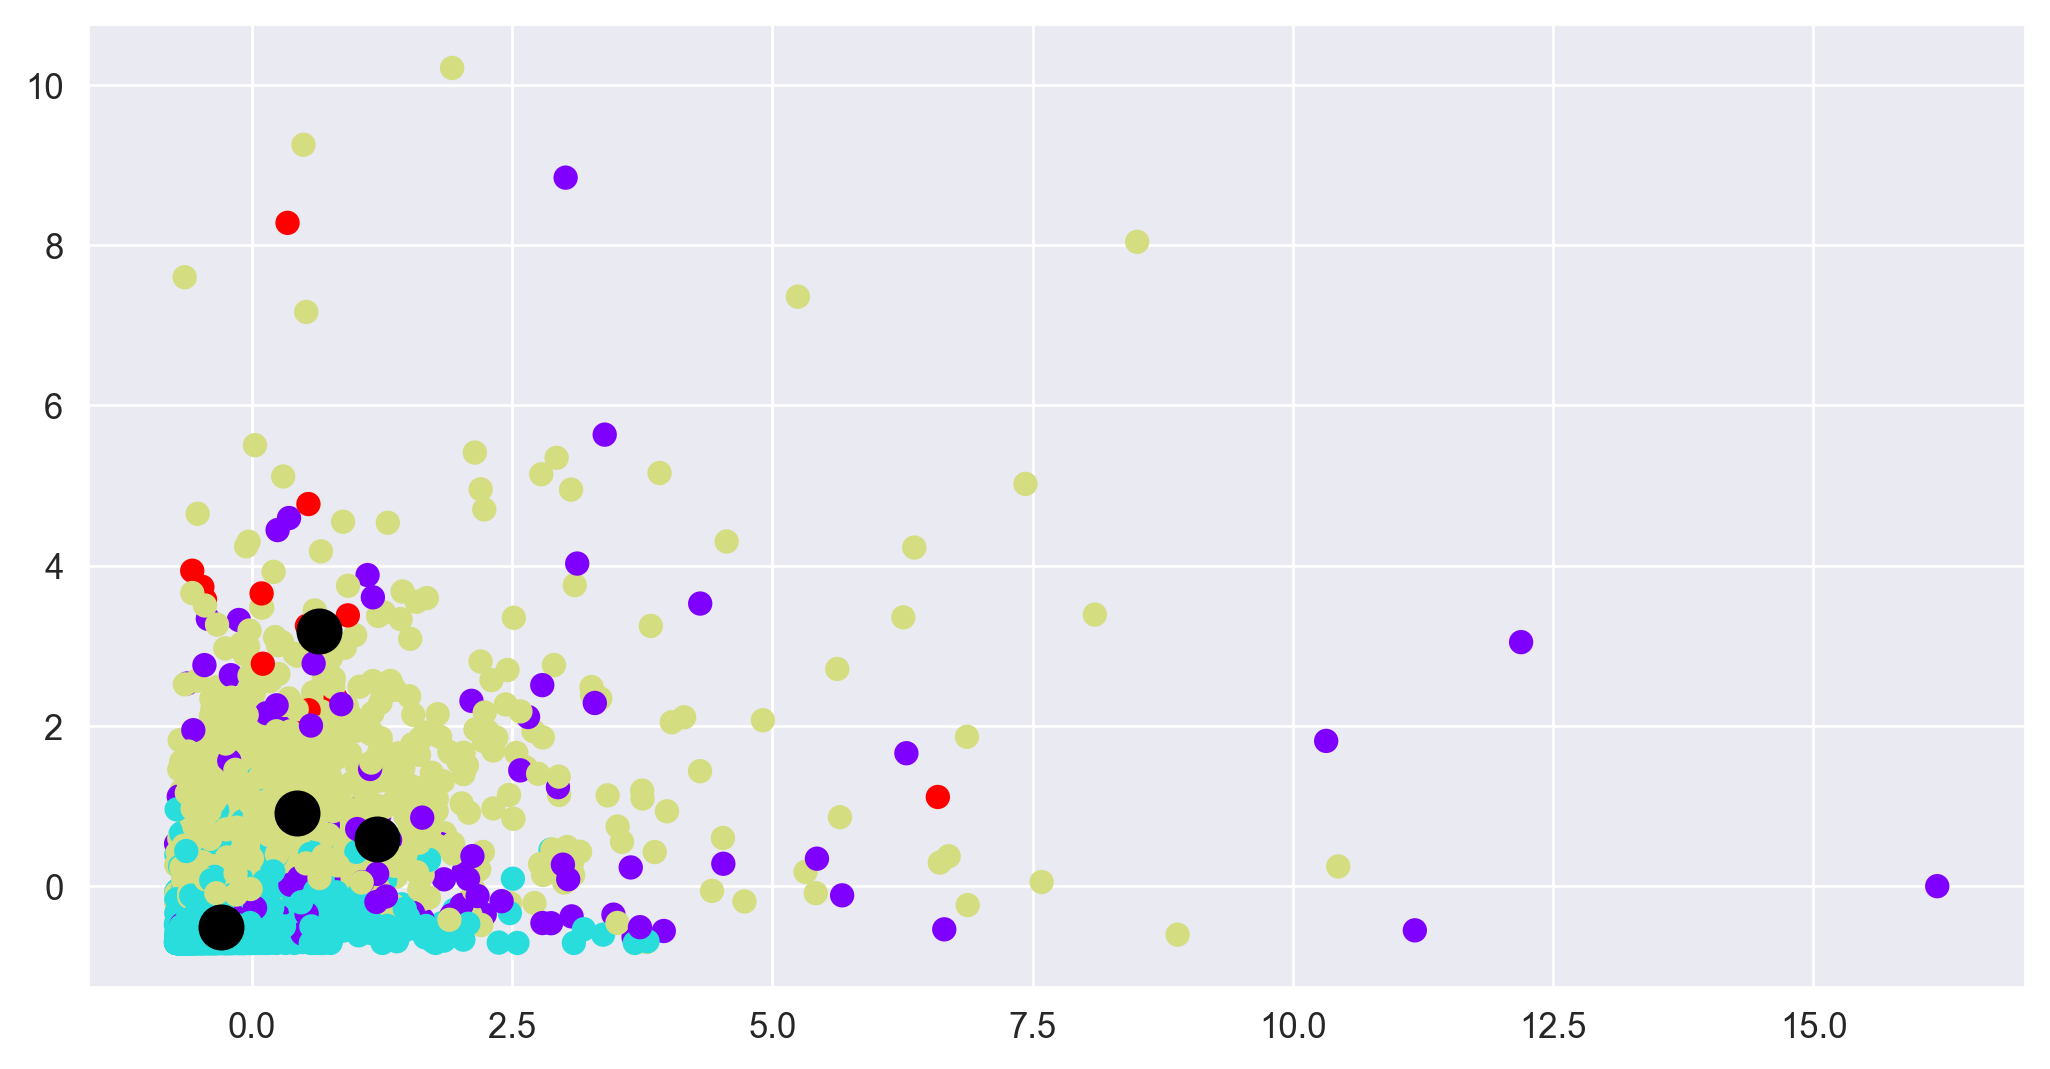

In [29]:
#Visualize the clusters
plt.scatter(x[:,0],x[:,5], c = ypred, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,5], c = 'black', s = 150)

In [30]:
#Silhouette score

In [31]:
from sklearn.metrics import silhouette_score

In [32]:
silhouette_score(x,ypred)

0.30964672960978246

In [33]:
#Analyzing clusters
df['cluster'] = ypred
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award?  cluster  
ID#                    
1          0        1  
2          0        1  
3          0        1  
4          0        1  
5          1        2  
...      ...      ...  
4017       1        1  
4018       1        1  
4019       1        2  
4020       0        1  
4021       0        1  

[3999 rows x 12 columns]

In [34]:
df.groupby('cluster').agg('mean')

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
cluster                                                               
0        194350.181818  778.460606   2.145455   1.036364   1.000000   
1         43817.171967   97.283863   1.223793   1.019238   1.000393   
2        116816.565252  156.371069   3.705189   1.002358   1.001572   
3        138061.400000   78.800000   3.466667   1.000000   4.066667   

          Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
cluster                                                                  
0        31215.236364    26.890909        5404.654545        15.763636   
1         4712.810365     6.933255         198.879073         0.619160   
2        39307.610063    18.772799         341.077044         1.014937   
3        93927.866667    28.066667         506.666667         1.600000   

         Days_since_enroll    Award?  
cluster                               
0              4703.181818  0.806061  
1              3695.742049  0.201413  
2              4883.514937  0.650157  
3              4613.866667  0.533333

<Axes: xlabel='Days_since_enroll', ylabel='Balance'>

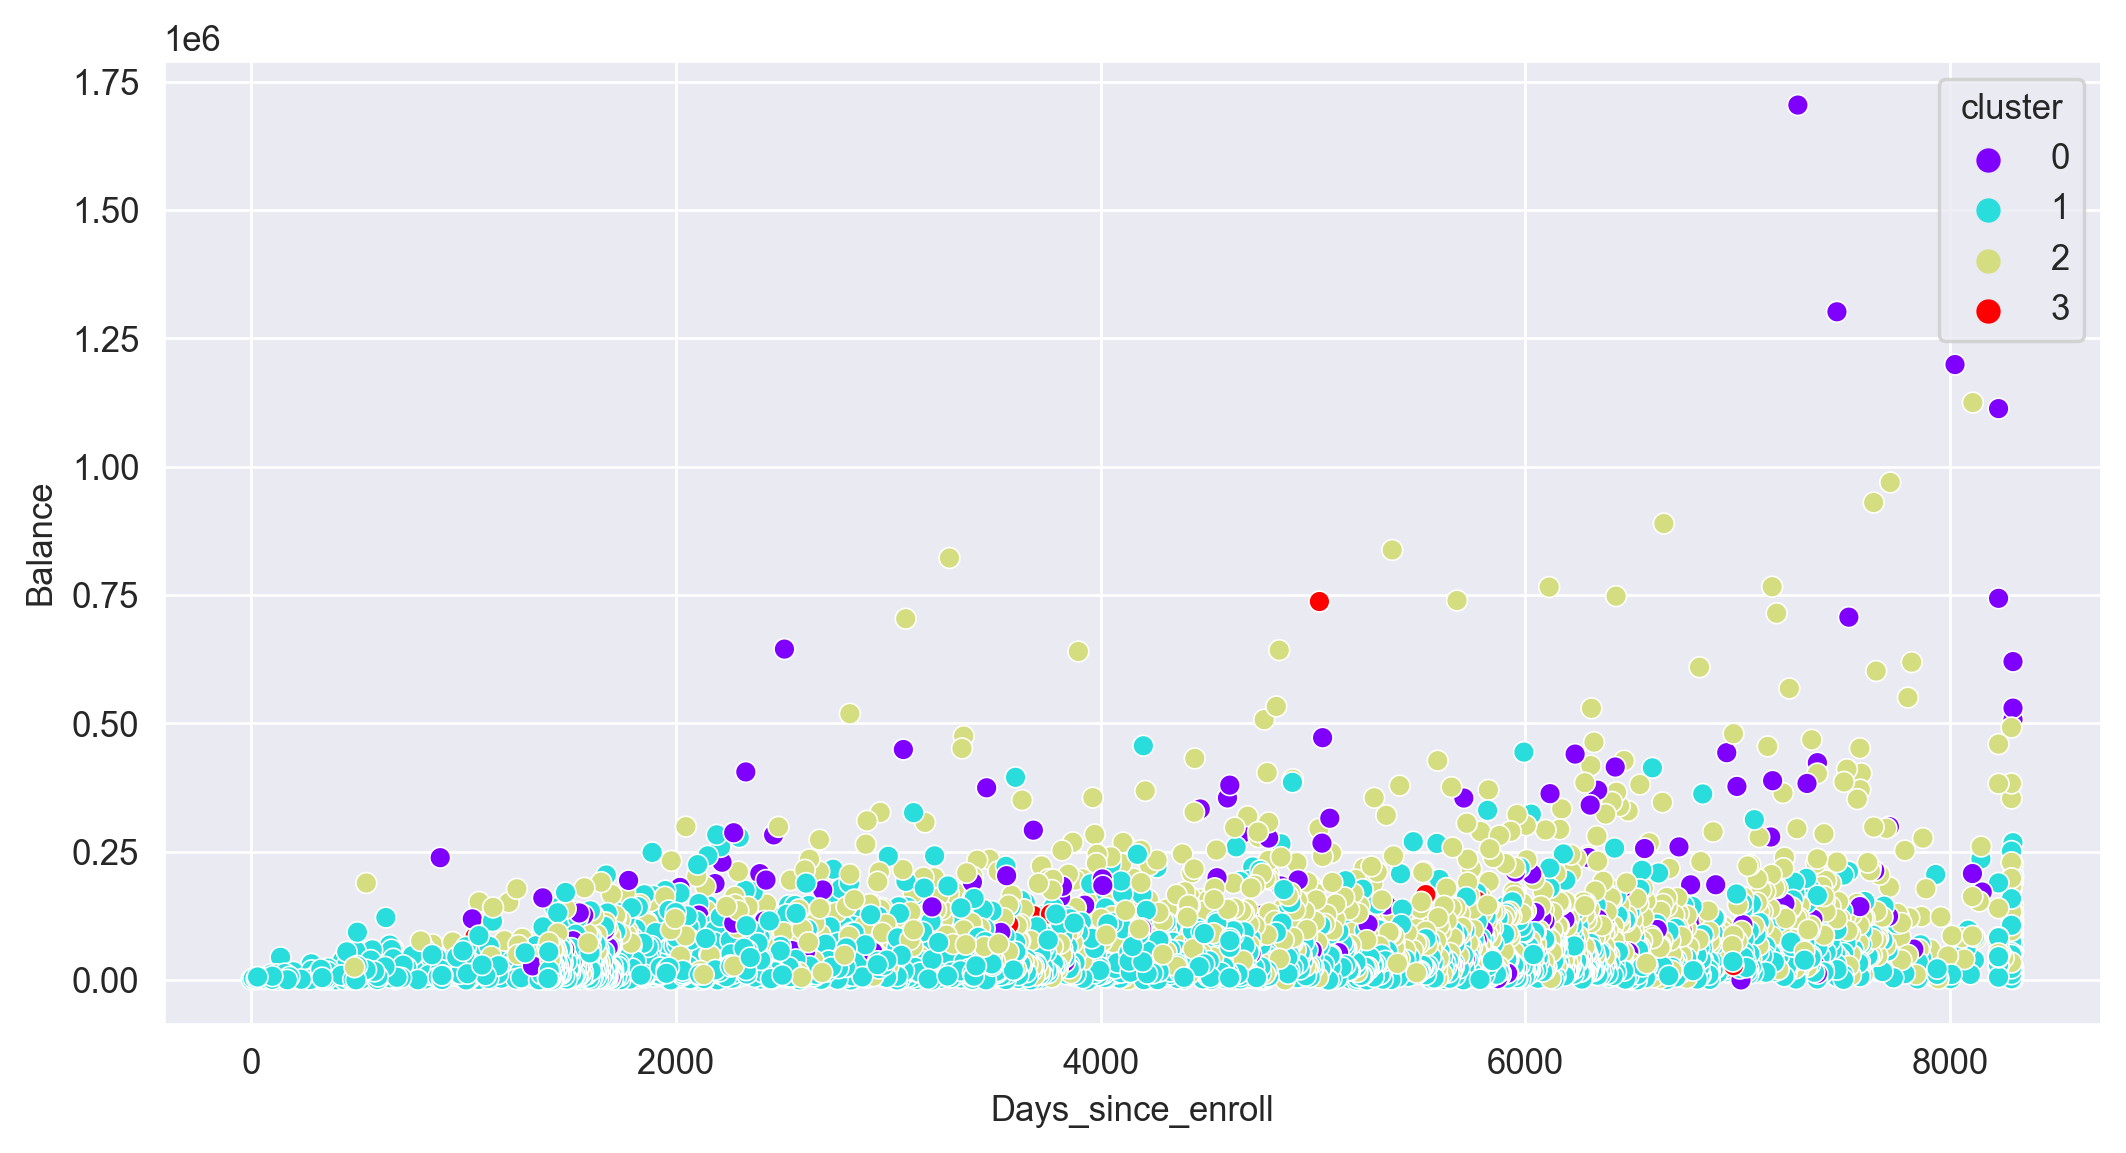

In [35]:
sns.scatterplot(x=df['Days_since_enroll'],y= df['Balance'], hue=df['cluster'], palette='rainbow')

# DBSCAN

(array([-250000.,       0.,  250000.,  500000.,  750000., 1000000.,
        1250000., 1500000., 1750000., 2000000.]),
 [Text(0, -250000.0, '−0.25'),
  Text(0, 0.0, '0.00'),
  Text(0, 250000.0, '0.25'),
  Text(0, 500000.0, '0.50'),
  Text(0, 750000.0, '0.75'),
  Text(0, 1000000.0, '1.00'),
  Text(0, 1250000.0, '1.25'),
  Text(0, 1500000.0, '1.50'),
  Text(0, 1750000.0, '1.75'),
  Text(0, 2000000.0, '2.00')])

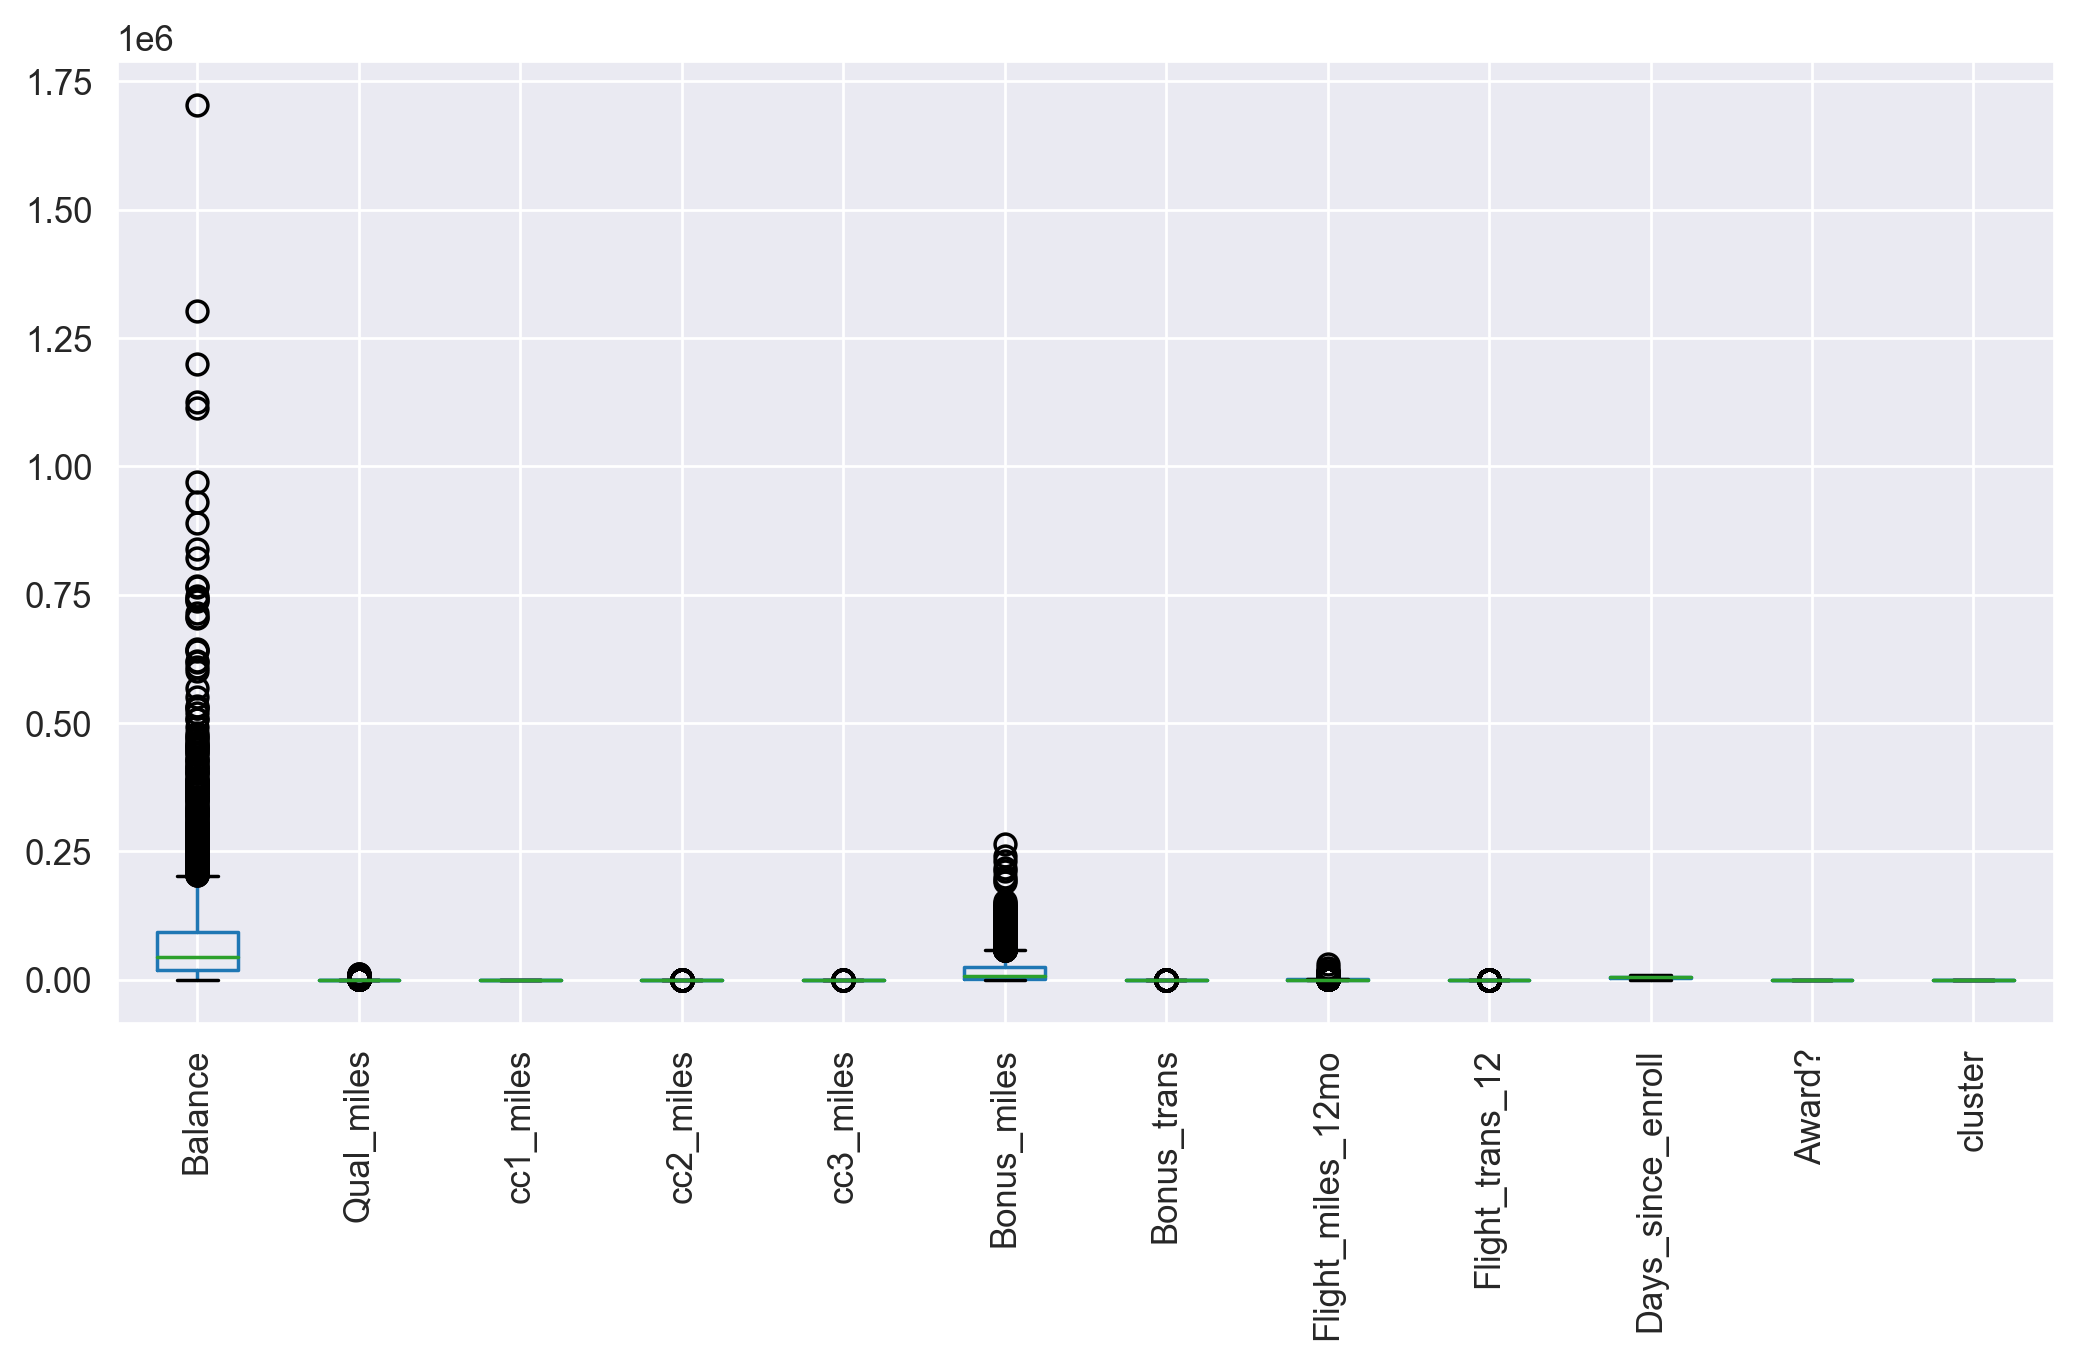

In [36]:
df.boxplot()
plt.xticks(rotation=90)
plt.yticks(rotation=360)

In [37]:
#Model Building

In [38]:
from sklearn.cluster import DBSCAN

In [39]:
db = DBSCAN(eps=0.5, min_samples=3)

y = db.fit_predict(x)
y

array([0, 0, 0, ..., 6, 0, 0], dtype=int64)

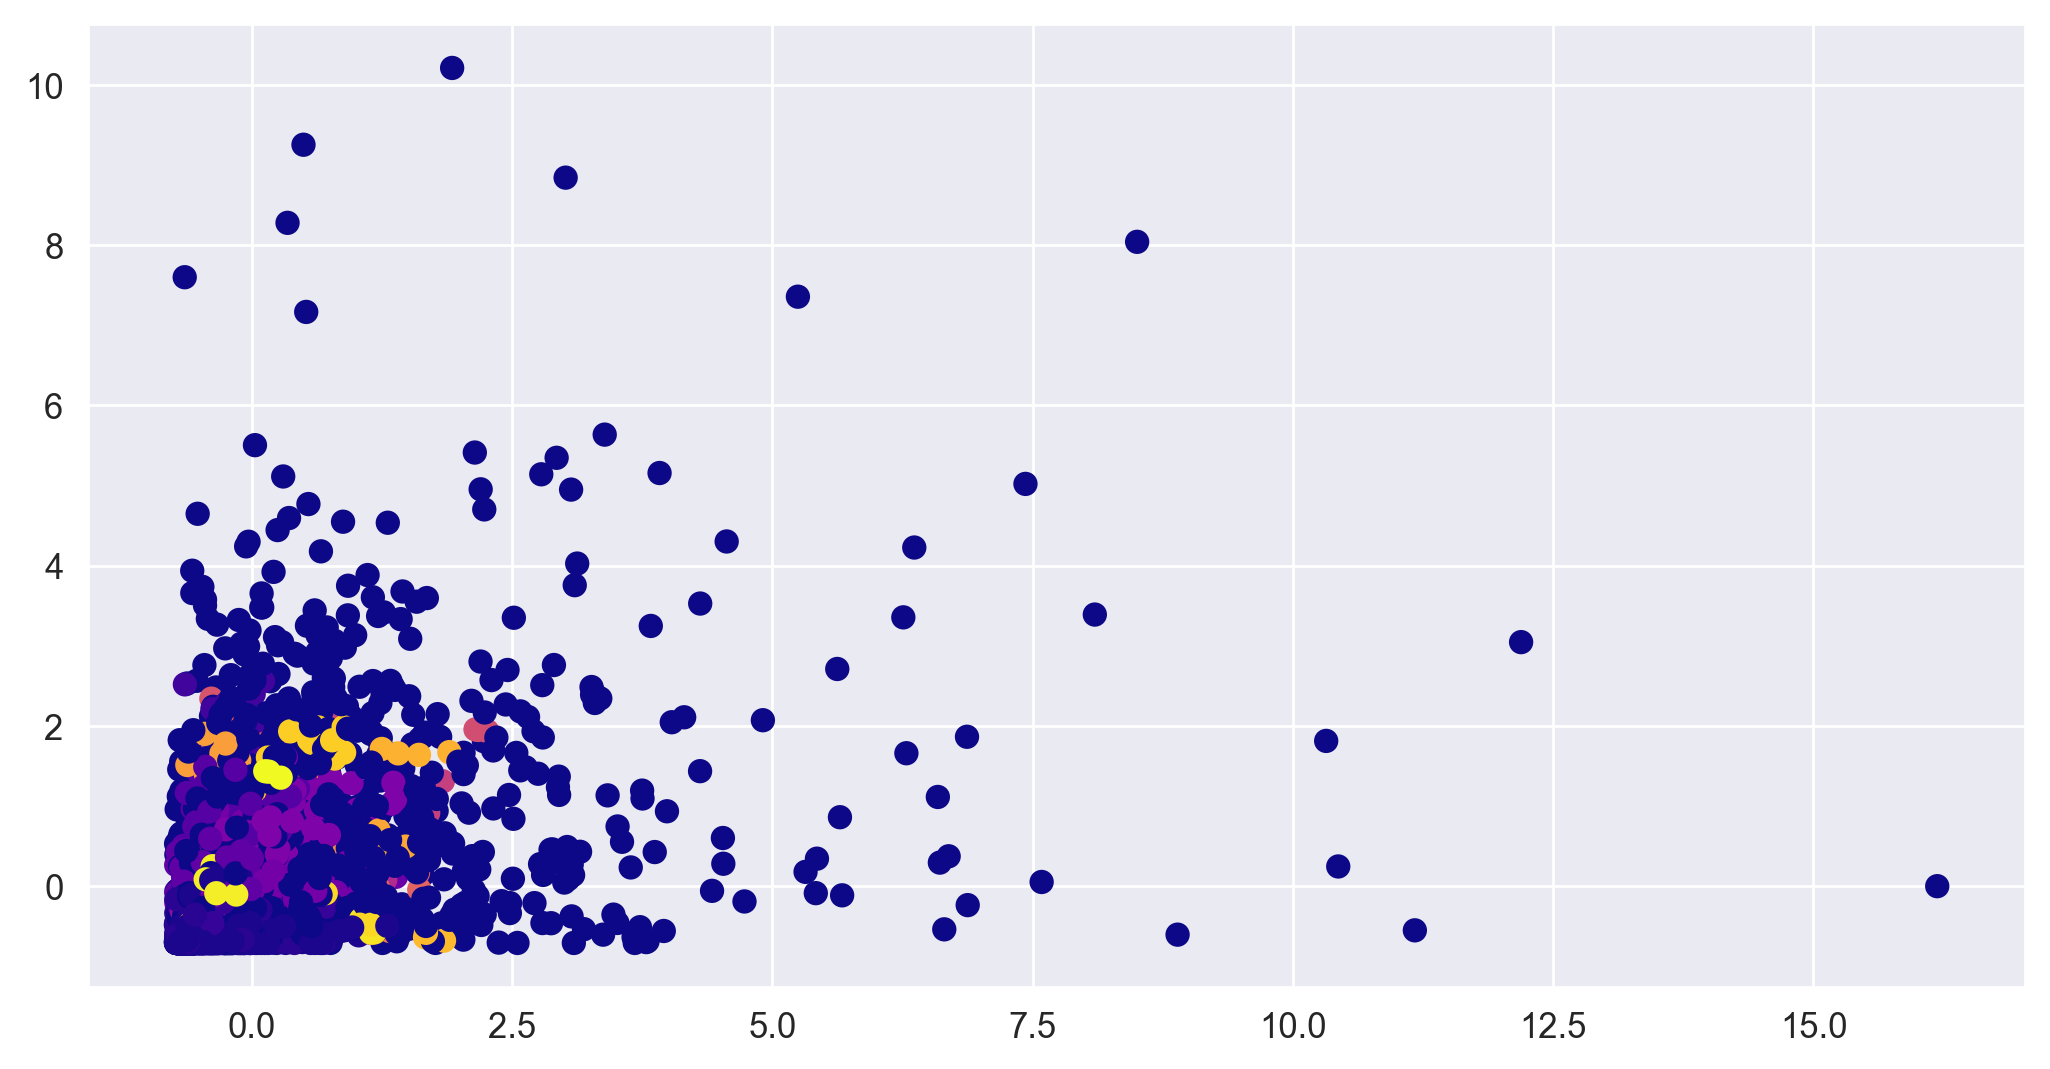

In [40]:
plt.scatter(x[:,0],x[:,5],c = y,cmap='plasma')

In [41]:
from sklearn.metrics import silhouette_score

In [42]:
silhouette_score(x,y)

-0.11448578186172835

In [43]:
#Hyperparameter tuning

In [44]:
from sklearn.neighbors import NearestNeighbors

In [45]:
neigh = NearestNeighbors(n_neighbors=5).fit(x)

In [46]:
d,index = neigh.kneighbors(x)

In [47]:
d

array([[0.        , 0.11184685, 0.12034246, 0.13535399, 0.13743209],
       [0.        , 0.11406276, 0.11437601, 0.13452284, 0.13743209],
       [0.        , 0.16540223, 0.19458949, 0.1984887 , 0.21935697],
       ...,
       [0.        , 0.16614779, 0.28024323, 0.53532954, 0.59813199],
       [0.        , 0.25725534, 0.27167409, 0.32912626, 0.35888565],
       [0.        , 0.00270574, 0.0112955 , 0.01528968, 0.0233006 ]])

In [48]:
distance = np.sort(d[:,1])
distance

array([0.00000000e+00, 0.00000000e+00, 2.26431613e-03, ...,
       6.61657940e+00, 6.67864158e+00, 7.46132314e+00])

Text(0.5, 1.0, 'K-Distance Graph')

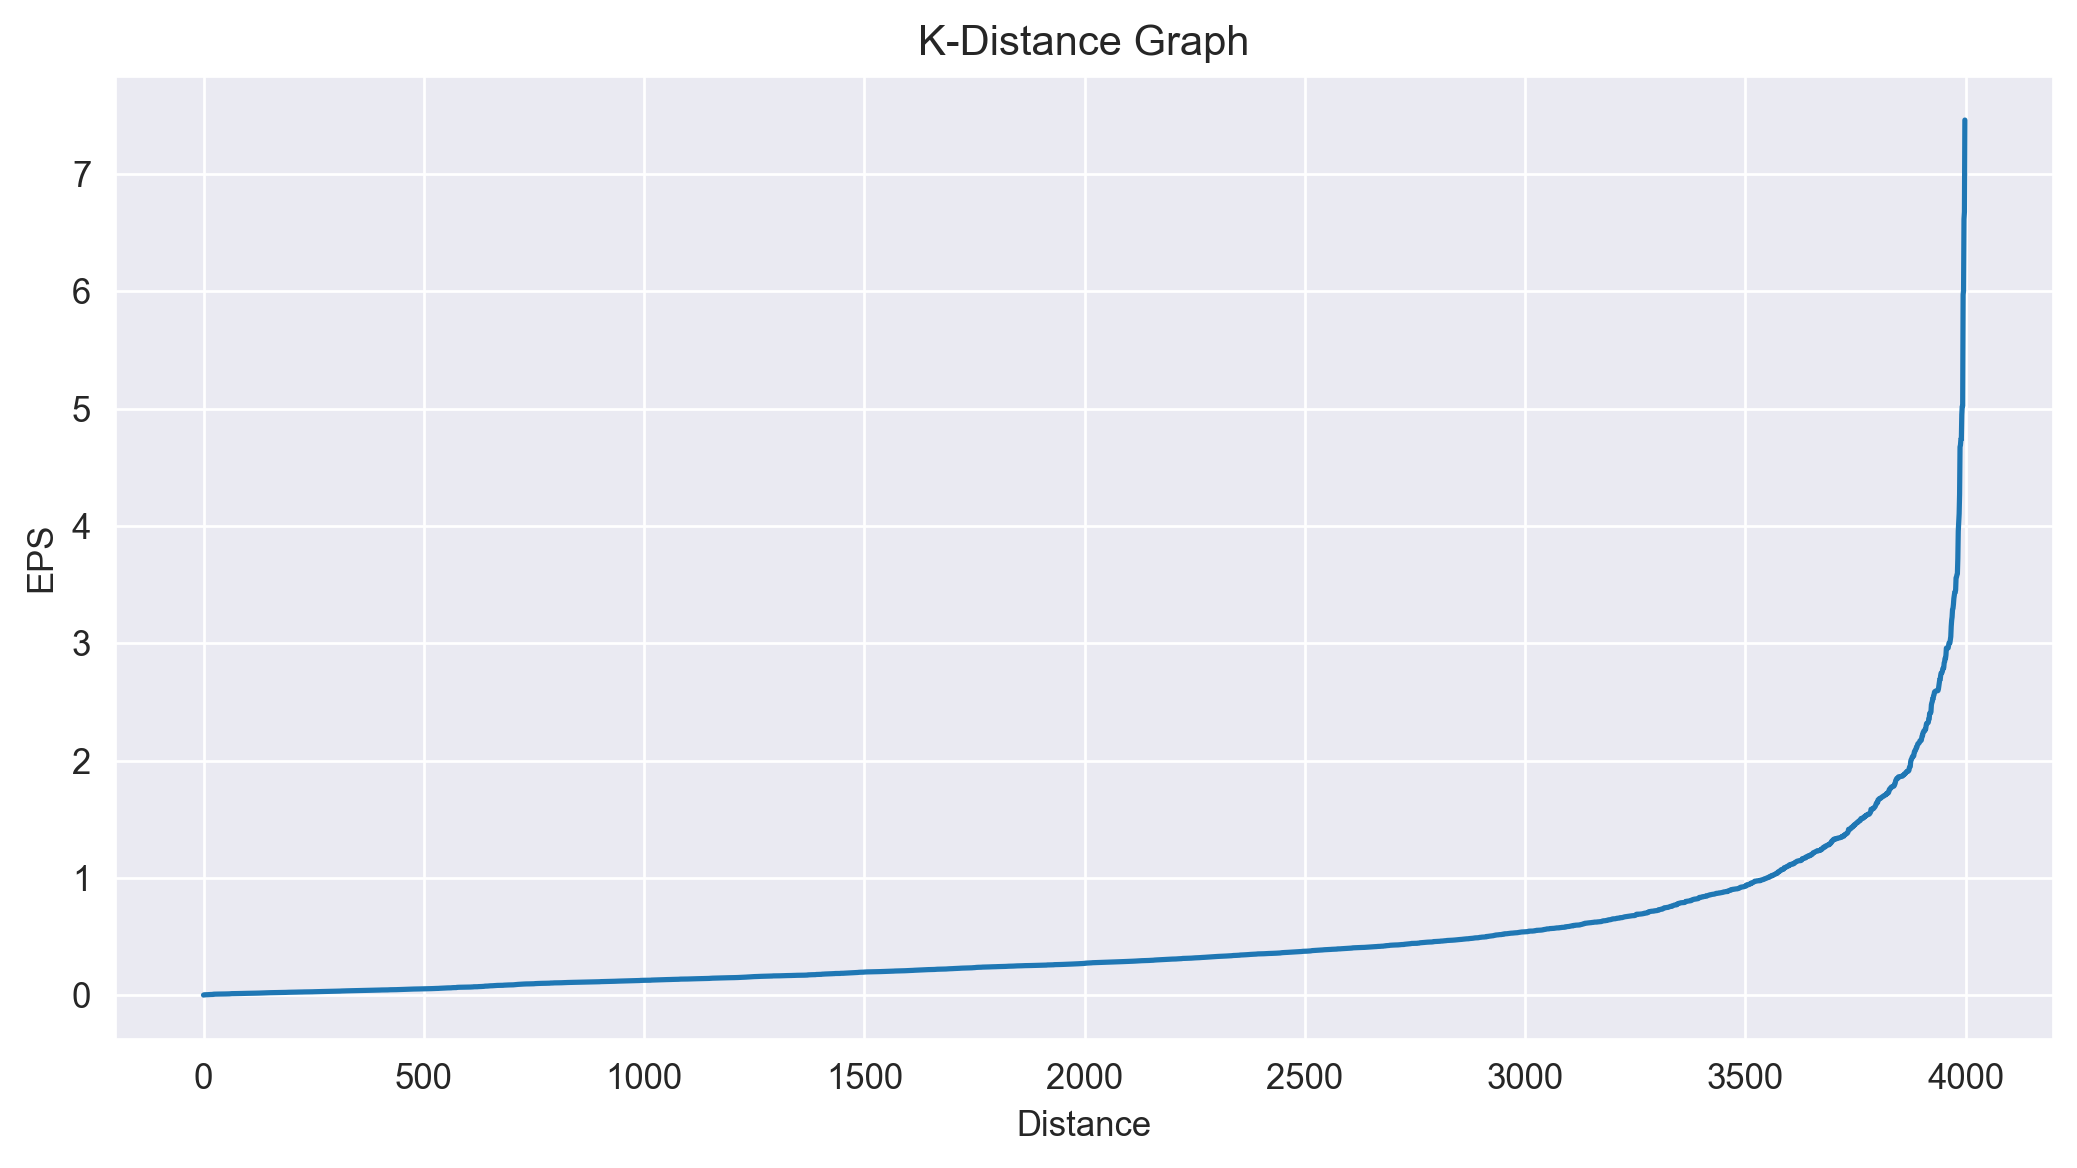

In [49]:
plt.plot(distance)
plt.xlabel('Distance')
plt.ylabel('EPS')
plt.title('K-Distance Graph')

In [50]:
#Evalute the model

In [51]:
dbs = DBSCAN(eps=3, min_samples=13)

yp = dbs.fit_predict(x)
yp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

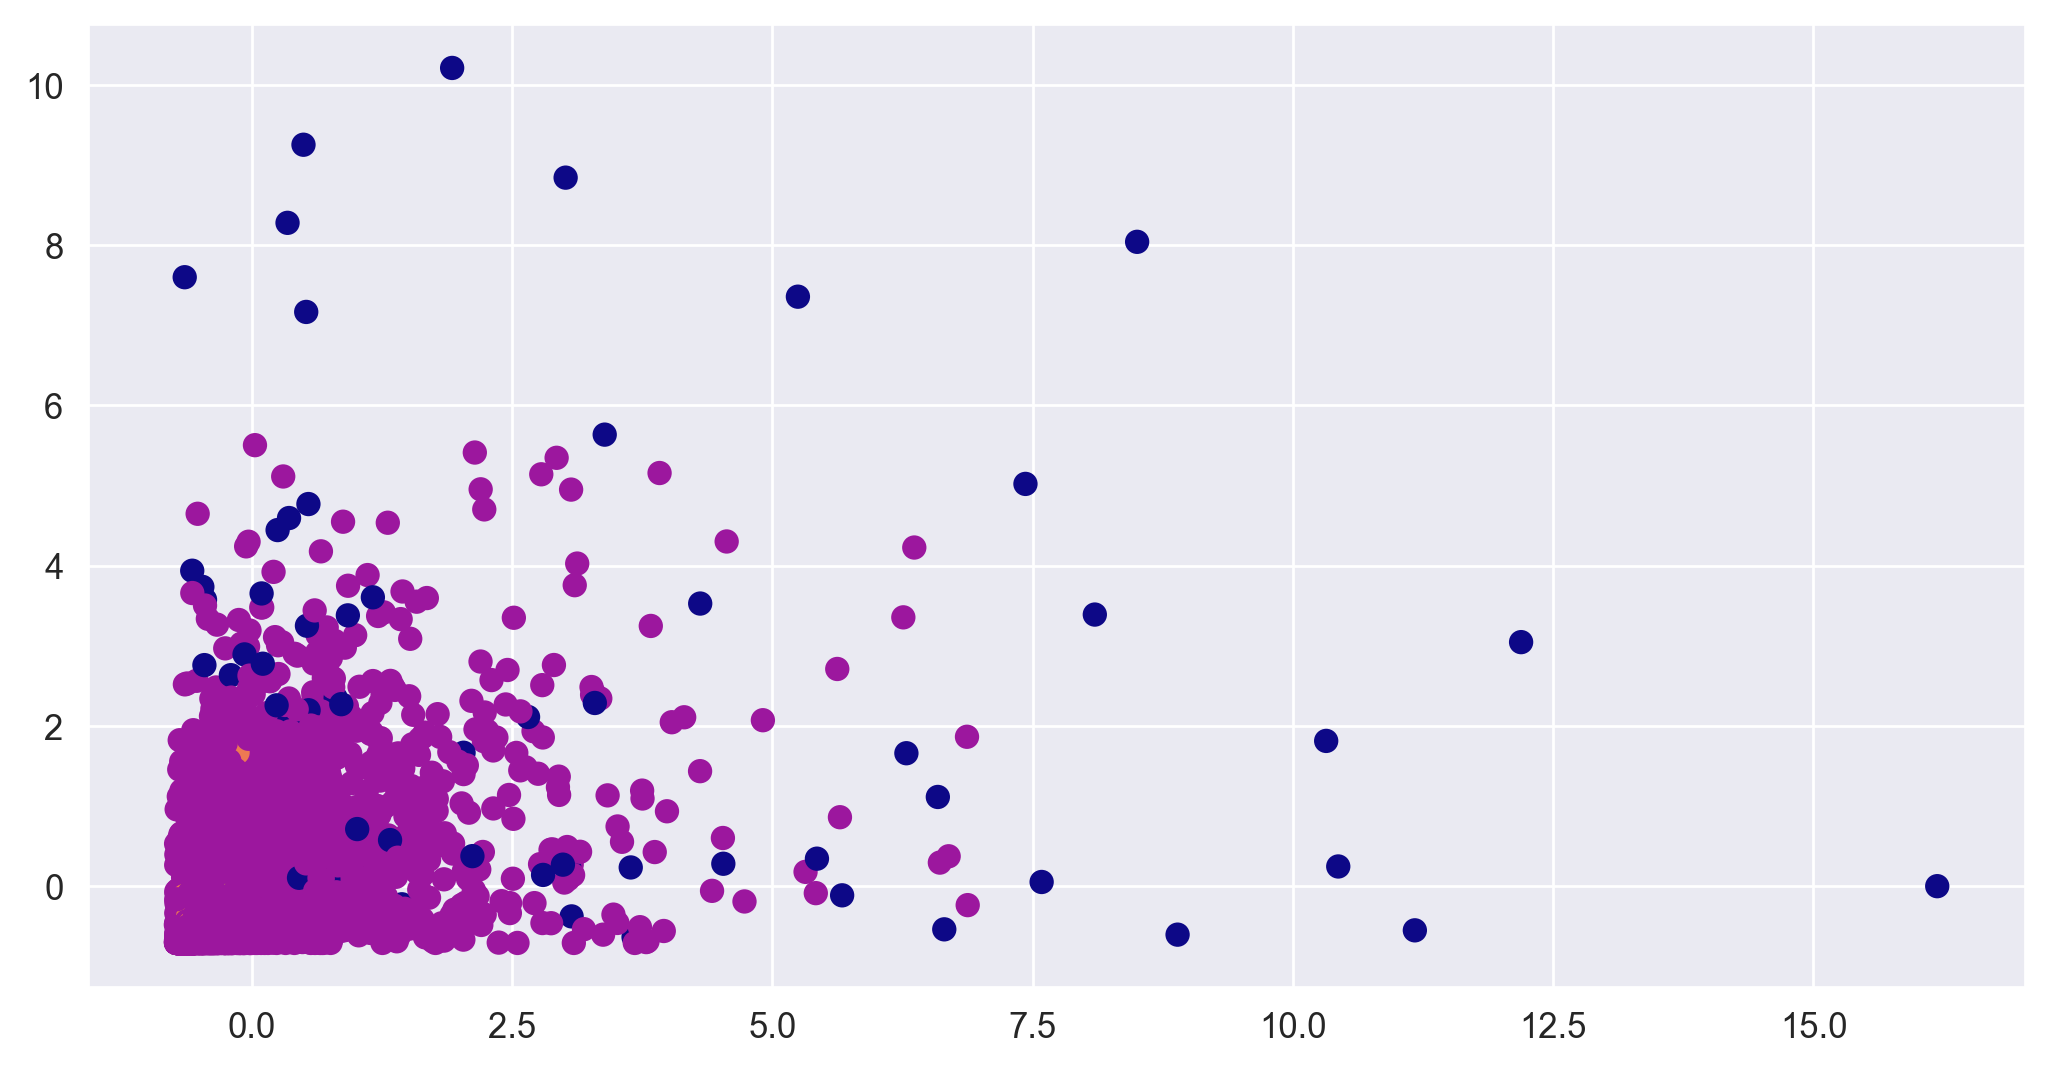

In [52]:
plt.scatter(x[:,0],x[:,5],c = yp, cmap='plasma')

In [53]:
silhouette_score(x,yp)

0.5445912609076593

In [54]:
#Analyze the clusters

In [55]:
df['Cluster'] = yp
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award?  cluster  Cluster  
ID#                             
1          0        1        0  
2          0        1        0  
3          0        1        0  
4          0        1        0  
5          1        2        0  
...      ...      ...      ...  
4017       1        1        0  
4018       1        1        0  
4019       1        2        0  
4020       0        1        0  
4021       0        1        0  

[3999 rows x 13 columns]

In [56]:
df.groupby('Cluster').agg('mean')

Balance   Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Cluster                                                                
-1       303002.206897  1991.931034   2.896552    1.08046   1.563218   
 0        68779.176820   104.030976   2.050336    1.00000   1.000000   
 1        39187.040000     0.000000   1.120000    2.00000   1.000000   
 2        41562.307692     0.000000   1.000000    3.00000   1.000000   

          Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Cluster                                                                  
-1       64194.229885    28.758621        4369.977011        12.183908   
 0       16129.909396    11.180692         374.232060         1.136035   
 1       11107.040000    14.840000         224.000000         0.800000   
 2       16338.230769    16.076923         323.076923         0.923077   

         Days_since_enroll    Award?   cluster  
Cluster                                         
-1             5074.666667  0.816092  1.068966  
 0             4099.718121  0.360867  1.291430  
 1             3703.240000  0.320000  1.080000  
 2             4133.384615  0.307692  1.000000

<Axes: xlabel='Days_since_enroll', ylabel='Balance'>

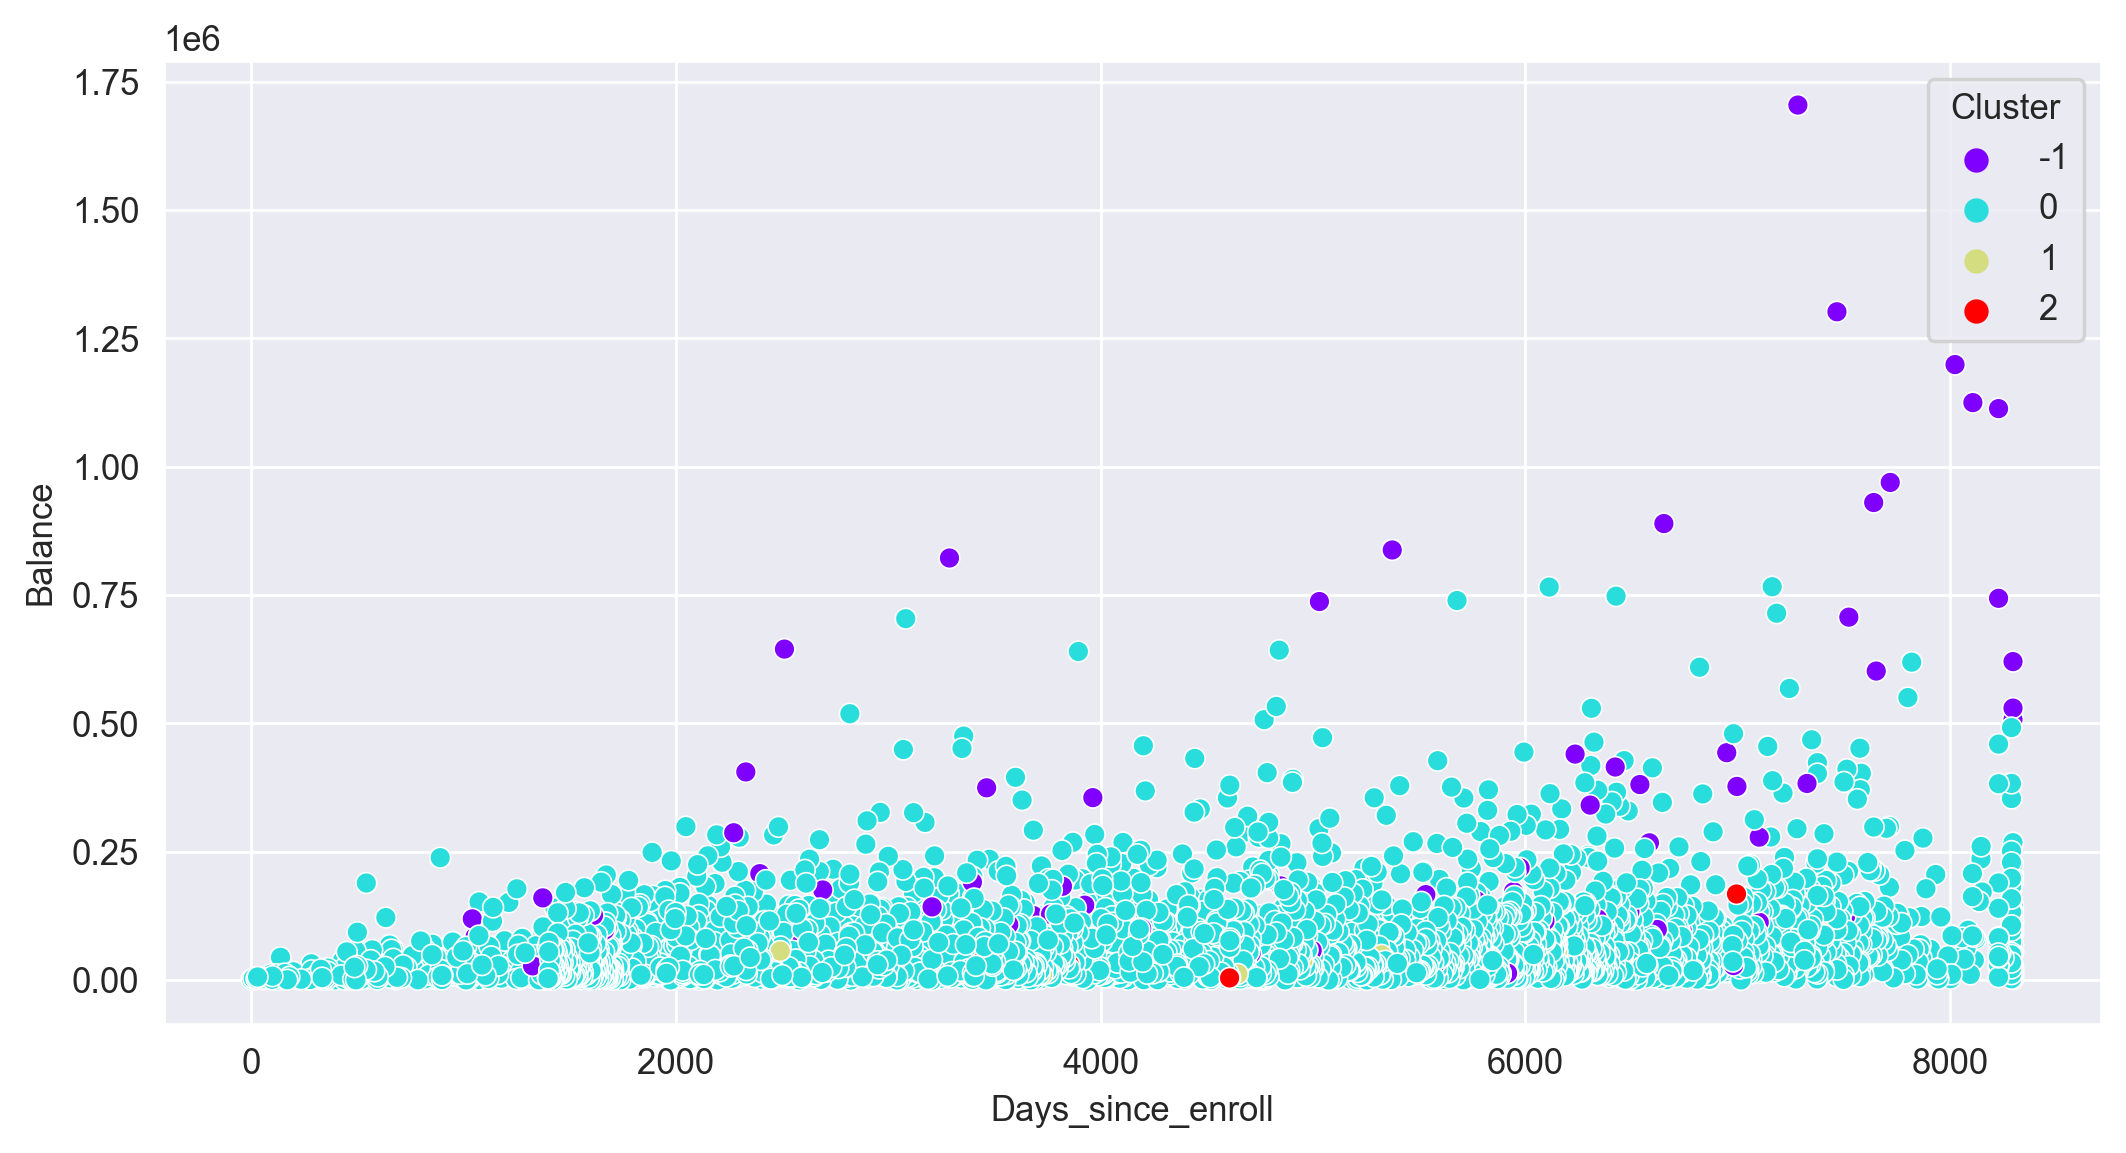

In [57]:
sns.scatterplot(x=df['Days_since_enroll'],y= df['Balance'], hue=df['Cluster'], palette='rainbow')